# Class Statistics

Gather background data on classes, etc. for proposal.

In [25]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl

In [26]:
# Load names and proposed classes dataset
# Excel file "~/Box/INFO 290T Project/Names and Proposed Classes.xlsx"
names_and_proposed_classes = pd.read_excel('~/Box/INFO 290T Project/Names and Proposed Classes.xlsx')
names_and_proposed_classes

,Name,Class
0,AM General Hummer SUV 2000,SUV
1,Acura RL Sedan 2012,Sedan
2,Acura TL Sedan 2012,Sedan
3,Acura TL Type-S 2008,Sedan
4,Acura TSX Sedan 2012,Sedan
...,...,...
191,Volkswagen Beetle Hatchback 2012,Hatchback
192,Volvo C30 Hatchback 2012,Hatchback
193,Volvo 240 Sedan 1993,Sedan
194,Volvo XC90 SUV 2007,SUV


  Proposed Class  Original Classes (Make, Model, Year)
0          Sedan                                    51
1            SUV                                    37
2          Coupe                                    32
3    Convertible                                    26
4         Pickup                                    16
5      Hatchback                                    13
6          Wagon                                     7
7            Van                                     7
8        Minivan                                     6
9          Hatch                                     1


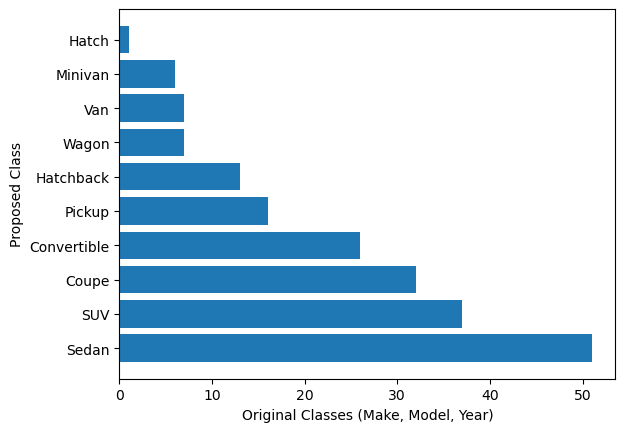

In [27]:
# Proposed classes and counts in original data
# Rename columns
proposed_classes = names_and_proposed_classes['Class'].value_counts().reset_index().rename(columns={'Class': 'Proposed Class', 'count': 'Original Classes (Make, Model, Year)'})
print(proposed_classes)

# Bar chart of counts by Class
# Horizontal bar chart
plt.barh(proposed_classes['Proposed Class'], proposed_classes['Original Classes (Make, Model, Year)'])
plt.xlabel('Original Classes (Make, Model, Year)')
plt.ylabel('Proposed Class')
plt.savefig('../Output/Original_Classes_by_Proposed_Class.png', bbox_inches='tight')

## Using Annotations Data for More Statistics

Images per category

In [28]:
# Bring in '~\Box\INFO 290T Project\Intermediate Data\cars_annos.xslx'
cars_annos = pd.read_excel('~/Box/INFO 290T Project/Intermediate Data/cars_annos.xlsx')
cars_annos

,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test,class_name
0,car_ims/000001.jpg,112,7,853,717,1,0,AM General Hummer SUV 2000
1,car_ims/000002.jpg,48,24,441,202,1,0,AM General Hummer SUV 2000
2,car_ims/000003.jpg,7,4,277,180,1,0,AM General Hummer SUV 2000
3,car_ims/000004.jpg,33,50,197,150,1,0,AM General Hummer SUV 2000
4,car_ims/000005.jpg,5,8,83,58,1,0,AM General Hummer SUV 2000
...,...,...,...,...,...,...,...,...
16180,car_ims/016181.jpg,38,36,375,234,196,1,smart fortwo Convertible 2012
16181,car_ims/016182.jpg,29,34,235,164,196,1,smart fortwo Convertible 2012
16182,car_ims/016183.jpg,25,32,587,359,196,1,smart fortwo Convertible 2012
16183,car_ims/016184.jpg,56,60,208,186,196,1,smart fortwo Convertible 2012


In [29]:
# Merge on 'Name' in names_and_proposed_classes being class_name in cars_annos
# Should be same length as cars_annos
print('length of cars_annos:', len(cars_annos))
proposed_class_images = pd.merge(names_and_proposed_classes, cars_annos, left_on='Name', right_on='class_name', how='left')
proposed_class_images

length of cars_annos: 16185


,Name,Class,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test,class_name
0,AM General Hummer SUV 2000,SUV,car_ims/000001.jpg,112,7,853,717,1,0,AM General Hummer SUV 2000
1,AM General Hummer SUV 2000,SUV,car_ims/000002.jpg,48,24,441,202,1,0,AM General Hummer SUV 2000
2,AM General Hummer SUV 2000,SUV,car_ims/000003.jpg,7,4,277,180,1,0,AM General Hummer SUV 2000
3,AM General Hummer SUV 2000,SUV,car_ims/000004.jpg,33,50,197,150,1,0,AM General Hummer SUV 2000
4,AM General Hummer SUV 2000,SUV,car_ims/000005.jpg,5,8,83,58,1,0,AM General Hummer SUV 2000
...,...,...,...,...,...,...,...,...,...,...
16180,smart fortwo Convertible 2012,Convertible,car_ims/016181.jpg,38,36,375,234,196,1,smart fortwo Convertible 2012
16181,smart fortwo Convertible 2012,Convertible,car_ims/016182.jpg,29,34,235,164,196,1,smart fortwo Convertible 2012
16182,smart fortwo Convertible 2012,Convertible,car_ims/016183.jpg,25,32,587,359,196,1,smart fortwo Convertible 2012
16183,smart fortwo Convertible 2012,Convertible,car_ims/016184.jpg,56,60,208,186,196,1,smart fortwo Convertible 2012


Class
Sedan          4211
SUV            3100
Coupe          2657
Convertible    2058
Pickup         1349
Hatchback      1103
Van             578
Wagon           576
Minivan         498
Hatch            55
Name: count, dtype: int64


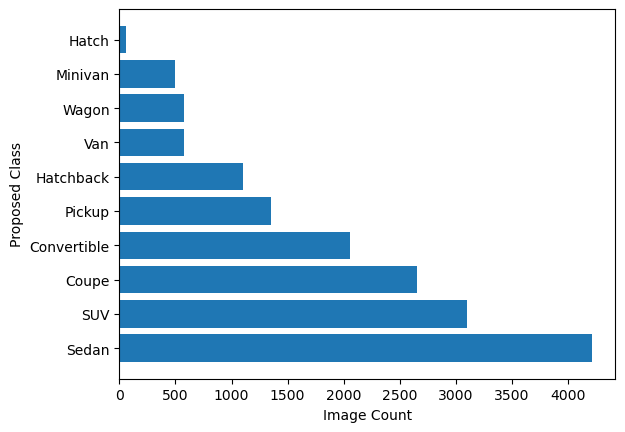

In [30]:
# Counts by Class
print(proposed_class_images['Class'].value_counts())

# Horizontal bar chart of counts by Class
plt.barh(proposed_class_images['Class'].value_counts().index, proposed_class_images['Class'].value_counts())
plt.xlabel('Image Count')
plt.ylabel('Proposed Class')
plt.savefig('../Output/Image_Counts_by_Proposed_Class.png', bbox_inches='tight')